#PROJECT NAME-AIRBNB BOOKING ANALYSIS

####PROJECT TYPE : EDA(EXPLOLATRY DATA analysis)

####Submitted By - Shivam Tiwari

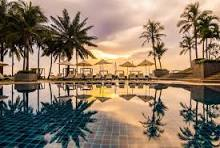

# **Project Summary -**

Objectives and Scope of the Project

The objective of this project is to analyze the Airbnb dataset to uncover key insights that can inform business decisions. Specifically, the project aims to:

Understand the distribution and preference of different room types. Analyze the popularity of various neighborhoods. Investigate pricing trends and availability. Evaluate the performance of listings based on reviews. The scope of the project includes data cleaning, exploratory data analysis (EDA), in-depth analysis, and deriving actionable recommendations.



# **GitHub Link - https://github.com/shivam14796**

# **Problem Statement**


In [ ]:
# importing the necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/data_science/Airbnb_NYC_2019.csv')

In [ ]:
data

#Basic inspection of data

In [ ]:
# Reading first five rows by head method
data.head()

In [ ]:
# reading the last five row using the tail method
data.tail()

In [ ]:
# CHECKING THE NUMBERS OF ROWS AND COLUMNS IN DATASET
rows=data.shape[0]
columns=data.shape[1]
print(f'There are {rows} rows and {columns} columns in the dataset')

In [ ]:
# lets have a view of columns we have lets list it and understand the columns we have got for analysis
data.columns

#Dataset information

In [ ]:
# lets check the info of our dataset
# it simply provide information about how many columns corresponding rows values are present with counting non null value
# together with this it also provides the columns data type of which is stored
data.info()

#Finding and handling duplicated value

In [ ]:
# lets check the info of our dataset
# it simply provide information about how many columns corresponding rows values are present with counting non null value
# together with this it also provides the columns data type of which is stored
data.duplicated().sum()

***Hence, we can draw a conclusion that there is no duplicated value in our dataset as we have already check it from duplicated function so no need to drop duplicated row .***

*****Data cleaning*****

#lets check missing value or null value and  if there is lets handle it

In [ ]:
## checking missing or nan value
data.isnull().sum()

****There are total of 4 columns as we can see above named['name ','host_name','last_review','reviews_per_month']in which null value is presented out of this columns ['last_review','reviews_per_month']have 10052 null value and columns ['name ','host_name'] have 16 and 21 null value.****

In [ ]:
## Fill missing values in 'name' and 'host_name' with 'Unknown'
data['name'].fillna('Unknown',inplace=True)
data['host_name'].fillna('unknown',inplace=True)


In [ ]:
# Fill missing values in 'last_review' with 'No Review'
data['last_review'].fillna('no_review',inplace=True)


In [ ]:
# Fill missing values in 'reviews_per_month' with 0
data['reviews_per_month'].fillna(0,inplace=True)

***we have filled all the missing value now lets check our data still null value exist or not once***

In [ ]:
data.isnull().sum()

***we can see now our data doesnot have even a single null value***

#Exploratory Data Analysis (EDA)

In [ ]:
# Descriptive statistics
data.describe()

**Key Visualizations and Initial Findings**


***1.Distribution of the room type :***


Visualized the count of different room types. Private rooms are the most common type of listing, followed by entire homes/apartments.

In [ ]:
# Distribution of room types:
room_type_counts= data['room_type'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=room_type_counts.index,y=room_type_counts.values,palette='viridis')
plt.title('Distribution of room type')
plt.xlabel('Room Type')
plt.ylabel("Count")
plt.show()

**2.Distribution of Prices:**

***Visualized the price distribution of listings. Prices vary widely, with a concentration of listings in the lower price range.***

In [ ]:
## Distribution of prices
plt.figure(figsize=(8,6))
sns.histplot(data['price'],bins=20,kde=True,color='darkblue')
plt.title('Distribution of prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

***3.Neighborhood Popularity:***

*Visualized the number of listings in each neighborhood group.
Manhattan and Brooklyn have the highest number of listings.*

In [ ]:
# Neighborhood popularity
Neighborhood_counts=data['neighbourhood_group'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=Neighborhood_counts.index,y=Neighborhood_counts.values,palette='coolwarm')
plt.title("Neighborhood Popularity")
plt.xlabel('neighbourhood_group')
plt.ylabel('count')
plt.show()


**4 Availability Analysis:**

Visualized the availability of listings throughout the year.

There is a wide range of availability, indicating potential seasonal trends.

In [ ]:
# Availability analysis
plt.figure(figsize=(8,6))
sns.histplot(data["availability_365"],bins=20,kde=True,color='green')
plt.title('availability distribution over 365 days ')
plt.xlabel('days')
plt.ylabel('frequency')
plt.show()

**5 Reviews per Month:**

Visualized the distribution of reviews per month.

Most listings have few reviews per month, with a long tail of listings with higher review counts.

In [ ]:
# Reviews per month
plt.figure(figsize=(8,6))
sns.histplot(data['reviews_per_month'], bins=30,kde=True,color='red')
plt.title('distribution of the reviews per month ')
plt.xlabel('reviews per month')
plt.ylabel('frequency')
plt.show()

#In-Depth Analysis

**Hypothesis Testing, Correlation Analysis, and Other Advanced Analysis**

1.Hypothesis Testing: Are Private Rooms Cheaper than Entire Homes/Apartments?: Conducted a t-test to compare the prices of private rooms and entire homes/apartments.

Private rooms are generally cheaper than entire homes/apartments.

In [ ]:
from scipy.stats import ttest_ind
# Extract prices for private rooms and entire homes/apartments
private_room_prices = data[data['room_type'] == 'Private room']['price']
entire_home_prices = data[data['room_type'] == 'Entire home/apt']['price']
# Perform t-test to compare means
t_stat, p_value = ttest_ind(private_room_prices, entire_home_prices)
print(f'T-statistic: {t_stat}, P-value: {p_value}')

**2 Correlation Analysis:**

Generated a correlation matrix to see how different numeric variables relate to each other.

Identified relationships between variables such as price, number of reviews, and availability.

In [ ]:
# Correlation analysis
# Filter out non-numeric columns
numeric_df = data.select_dtypes(include=[np.number])

# Generate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


**Insights and Recommendations**
*Summary of Findings and Actionable Recommendations*

**1Room Type Preference:**

Private rooms are the most popular type of listing on Airbnb.

Recommendation: Promote private room listings to attract budget-conscious travelers.

**2.Neighborhood Popularity:**

Manhattan and Brooklyn are the most popular neighborhoods for listings.

Recommendation: Focus marketing efforts on popular neighborhoods like Manhattan and Brooklyn.

**3.Price Insights:**

Private rooms tend to be cheaper than entire homes/apartments.

Recommendation: Encourage hosts of private rooms to maintain competitive pricing to attract more guests.

**4 Seasonal Availability:**

Listings have varied availability throughout the year, indicating potential seasonal trends.

Recommendation: Advise hosts to optimize availability during peak seasons to maximize occupancy rates.

**5.Reviews and Performance:**

Listings with higher reviews per month indicate higher guest satisfaction.

Recommendation: Encourage hosts to improve guest experience to garner more positive reviews.

# **Conclusion**


Recap of the Project and Its Implications for Stakeholders This project provided a comprehensive analysis of the Airbnb dataset, highlighting key insights into room type preferences, neighborhood popularity, pricing trends, and listing performance. By understanding these patterns, Airbnb and its hosts can make informed decisions to enhance guest experiences, optimize pricing strategies, and focus marketing efforts effectively. The insights and recommendations derived from this analysis can help Airbnb improve its platform and ensure higher satisfaction for both guests and hosts.



### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***